In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import matplotlib.pyplot as plt

In [10]:
import matplotlib.ticker as ticker

In [11]:
import datetime as dt

In [12]:
from prophet import Prophet

In [13]:
# new try

In [14]:
#df2 = pd.read_csv("gemini_BTCUSD_day.csv", usecols = ['Date','Close'])

In [15]:
df2 = pd.read_csv("gemini_BTCUSD_2015_1min.csv", usecols = ['Date','Close']) 

In [16]:
df2.index = df2.index[::-1]

In [17]:
df2 = df2.reindex(index=df2.index[::-1])

In [18]:
df2['Date']


0       27/12/2015 12:30
1       27/12/2015 12:31
2       27/12/2015 12:32
3       27/12/2015 12:33
4       27/12/2015 12:34
              ...       
6445    31/12/2015 23:55
6446    31/12/2015 23:56
6447    31/12/2015 23:57
6448    31/12/2015 23:58
6449    31/12/2015 23:59
Name: Date, Length: 6450, dtype: object

In [19]:
df2.rename(columns = {'Date':'ds', 'Close':'y' }, inplace = True)

In [20]:
df2.head()

,ds,y
0,27/12/2015 12:30,421.33
1,27/12/2015 12:31,421.33
2,27/12/2015 12:32,421.33
3,27/12/2015 12:33,421.33
4,27/12/2015 12:34,421.33


In [21]:
model2 = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'multiplicative', growth = 'linear')
model2.fit(df2)
future = model2.make_future_dataframe(periods = 30)
forecast = model2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Initial log joint probability = -2.27661
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       29578.1    0.00252074       3462.13      0.8283      0.8283      149   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       29974.3    0.00335283       63253.2           1           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       30154.7     0.0128035        114072      0.4831           1      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       30353.3     0.0107259       9318.54           1           1      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       30501.3    0.00681457       21999.2           1           1      657   
    Iter      log prob        ||dx||      ||grad||       alpha  

,ds,yhat,yhat_lower,yhat_upper
6475,2016-01-26 23:59:00,-6082.000811,-57503.587708,54757.160765
6476,2016-01-27 23:59:00,-5458.490735,-51866.950263,48172.745707
6477,2016-01-28 23:59:00,-4672.392230,-45231.550104,41127.305481
6478,2016-01-29 23:59:00,-3742.415002,-35622.546727,32709.900173
6479,2016-01-30 23:59:00,-2692.963908,-25518.133195,23651.231502


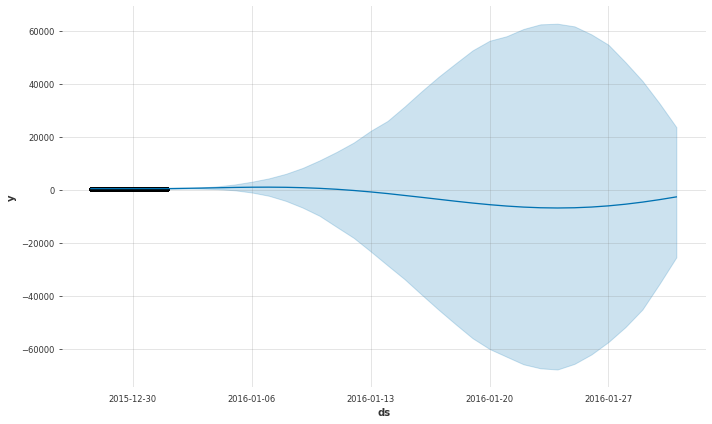

In [22]:
fig1 = model2.plot(forecast)

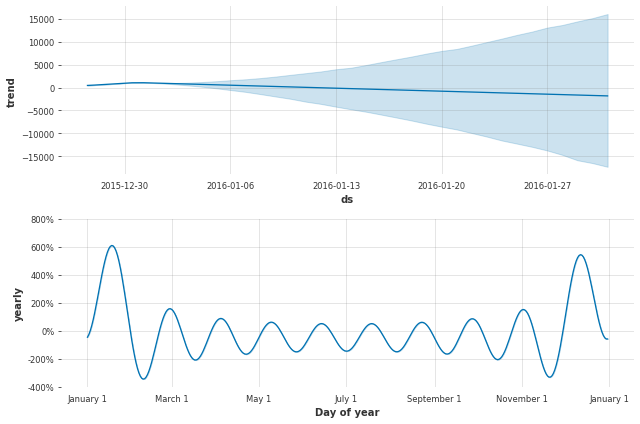

In [23]:
fig2 = model2.plot_components(forecast)